In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('../artifacts/mail_data.csv')

In [68]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [69]:
data.shape

(5572, 2)

In [70]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

### Text Preprocessing

In [71]:
import re
import string

In [72]:
data["Message"].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

Convert Uppercase To Lowercase

In [73]:
data["Message"] = data["Message"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [74]:
data.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


Remove Links

In [75]:
data["Message"] = data["Message"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [76]:
data.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


Remove Punctuation

In [77]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["Message"] = data["Message"].apply(remove_punctuations)

In [79]:
data.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


In [80]:
data.tail()

,Category,Message
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...
5571,ham,rofl its true to its name


Remove Numbers

In [81]:
data["Message"] = data["Message"].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/n6/s7d69qh16nd4dvdfhqh_17yc0000gn/T/ipykernel_63379/2191181006.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["Message"] = data["Message"].str.replace('\d+', '', regex=True)


In [82]:
data.tail()

,Category,Message
5567,spam,this is the nd time we have tried contact u u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...
5571,ham,rofl its true to its name


Remove Stopwords

In [83]:
!pip install nltk

In [84]:
import nltk

In [85]:
nltk.download('stopwords', download_dir='../static/model/')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [86]:
with open ('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [87]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
data["Message"] = data["Message"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [89]:
data["Message"].head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: Message, dtype: object

Stemming

In [90]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [91]:
data["Message"] = data["Message"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [92]:
data["Message"].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4            nah dont think goe usf live around though
Name: Message, dtype: object

In [93]:
data

,Category,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
...,...,...
5567,spam,nd time tri contact u u £ pound prize claim ea...
5568,ham,ü b go esplanad fr home
5569,ham,piti mood soani suggest
5570,ham,guy bitch act like id interest buy someth els ...


### Building Vocabulary

In [94]:
from collections import Counter
vocab = Counter()

In [95]:
vocab

Counter()

In [96]:
for sentence in data["Message"]:
    vocab.update(sentence.split())

In [97]:
vocab

Counter({'u': 1154,
         'call': 654,
         'im': 467,
         'go': 456,
         'get': 451,
         'ur': 390,
         'come': 300,
         'dont': 287,
         'ok': 278,
         'free': 278,
         'ltgt': 276,
         '£': 271,
         'know': 270,
         'like': 257,
         'day': 256,
         'love': 249,
         'want': 245,
         'ill': 241,
         'got': 240,
         'time': 239,
         'good': 237,
         'text': 225,
         'send': 205,
         'need': 187,
         'one': 181,
         'txt': 176,
         'see': 172,
         'today': 169,
         'ü': 169,
         'think': 166,
         'stop': 163,
         'home': 162,
         'repli': 160,
         'take': 160,
         'lor': 160,
         'tell': 156,
         'sorri': 156,
         'still': 154,
         'r': 154,
         'back': 152,
         'mobil': 151,
         'n': 147,
         'make': 147,
         'phone': 142,
         'say': 139,
         'pleas': 137,
         'n

In [98]:
len(vocab)

7228

In [99]:
data.shape

(5572, 2)

In [100]:
tokens = [key for key in vocab if vocab[key] > 10]

In [101]:
len(tokens)

796

In [102]:
tokens

['go',
 'point',
 'crazi',
 'avail',
 'n',
 'great',
 'world',
 'e',
 'got',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'free',
 'entri',
 'wkli',
 'comp',
 'win',
 'final',
 'st',
 'may',
 'text',
 'receiv',
 'txt',
 'appli',
 'dun',
 'say',
 'earli',
 'c',
 'alreadi',
 'dont',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'freemsg',
 'hey',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'xxx',
 'send',
 '£',
 'even',
 'brother',
 'speak',
 'treat',
 'per',
 'request',
 'set',
 'caller',
 'press',
 'copi',
 'friend',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'prize',
 'reward',
 'claim',
 'call',
 'code',
 'valid',
 'hour',
 'mobil',
 'month',
 'r',
 'updat',
 'latest',
 'colour',
 'camera',
 'co',
 'im',
 'gonna',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'tonight',
 'k',
 'ive',
 'enough',
 'today',
 'chanc',
 'cash',
 'pound',
 'cost',
 'day',
 'repli',
 'info',
 'urgent',
 'tc',
 'pobox',
 'search',
 'right',
 'thank',
 'promis',
 '

In [103]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Devide Dataset

In [104]:
x = data["Message"]
y = data["Category"]

In [105]:
!pip install scikit-learn

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [107]:
x_train.shape

(4457,)

In [108]:
x_test.shape

(1115,)

### Vectorization

In [109]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new

In [110]:
vectorized_x_train = vectorizer(x_train, tokens)

In [111]:
vectorized_x_test = vectorizer(x_test, tokens)

In [112]:
y_train.value_counts()

Category
ham     3850
spam     607
Name: count, dtype: int64

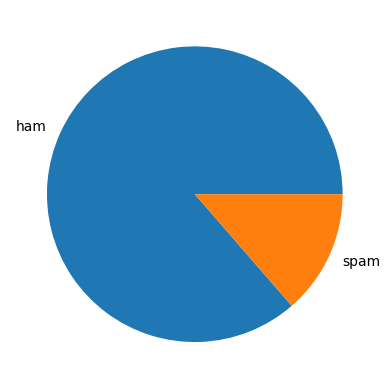

In [113]:
plt.pie(np.array([y_train.value_counts()['ham'], y_train.value_counts()['spam']]), labels=['ham', 'spam'])
plt.show()

### Handle Imbalanced Dataset

In [114]:
!pip install imbalanced-learn

In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(7700, 796) (7700,)


In [116]:
y_train_smote.value_counts()

Category
ham     3850
spam    3850
Name: count, dtype: int64

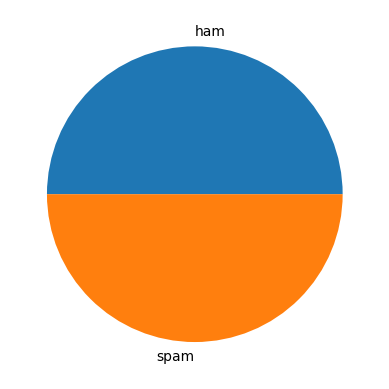

In [117]:
plt.pie(np.array([y_train_smote.value_counts()['ham'], y_train_smote.value_counts()['spam']]), labels=['ham', 'spam'])
plt.show()

### From Following Stuff can Train a Module

In [118]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [119]:
y_train_smote

0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
7695    spam
7696    spam
7697    spam
7698    spam
7699    spam
Name: Category, Length: 7700, dtype: object

In [120]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [121]:
y_test

1398    ham
4750    ham
1633    ham
3538    ham
4838    ham
       ... 
1949    ham
3233    ham
5083    ham
2904    ham
1413    ham
Name: Category, Length: 1115, dtype: object

## Model Training and Evaluation

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# def training_scores(y_act, y_pred):
#     acc = round(accuracy_score(y_act, y_pred), 3)
#     pr = round(precision_score(y_act, y_pred,), 3)
#     rec = round(recall_score(y_act, y_pred, ), 3)
#     f1 = round(f1_score(y_act, y_pred), 3)
#     print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, pos_label='spam'), 3)
    rec = round(recall_score(y_act, y_pred, pos_label='spam'), 3)
    f1 = round(f1_score(y_act, y_pred, pos_label='spam'), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')



# def validation_scores(y_act, y_pred):
#     acc = round(accuracy_score(y_act, y_pred), 3)
#     pr = round(precision_score(y_act, y_pred), 3)
#     rec = round(recall_score(y_act, y_pred), 3)
#     f1 = round(f1_score(y_act, y_pred), 3)
#     print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred, pos_label='spam'), 3)
    rec = round(recall_score(y_act, y_pred, pos_label='spam'), 3)
    f1 = round(f1_score(y_act, y_pred, pos_label='spam'), 3)
    print(f'Validation Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


### Logistic Regression

In [124]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.964
	Precision = 0.983
	Recall = 0.945
	F1-Score = 0.964
Validation Scores:
	Accuracy = 0.973
	Precision = 0.857
	Recall = 0.943
	F1-Score = 0.898


### Naive Bayes

In [125]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.955
	Precision = 0.964
	Recall = 0.945
	F1-Score = 0.954
Validation Scores:
	Accuracy = 0.961
	Precision = 0.805
	Recall = 0.914
	F1-Score = 0.856


### Decision Tree

In [126]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.998
	Precision = 1.0
	Recall = 0.995
	F1-Score = 0.998
Validation Scores:
	Accuracy = 0.945
	Precision = 0.755
	Recall = 0.836
	F1-Score = 0.793


### Random Forest

In [127]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.998
	Precision = 1.0
	Recall = 0.995
	F1-Score = 0.998
Validation Scores:
	Accuracy = 0.98
	Precision = 0.968
	Recall = 0.871
	F1-Score = 0.917


### Support Vector Machine

In [128]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.974
	Precision = 0.994
	Recall = 0.953
	F1-Score = 0.973
Validation Scores:
	Accuracy = 0.972
	Precision = 0.887
	Recall = 0.893
	F1-Score = 0.89


In [129]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(mnb, file)